In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import os

In [12]:
working_directory = os.getcwd()
print(working_directory)

/Users/phebe/GitHub/Springboard/CapstoneTwo


In [13]:
# Imported using variables due to path issues.
path = '/Users/phebe/GitHub/Springboard/CapstoneTwo/data/EEG_machinelearning_data_BRMH.csv'
psych_data = pd.read_csv(path)
data_uc = psych_data.copy()

# Inspect data

In [14]:
data_uc.info

<bound method DataFrame.info of      no. sex   age    eeg.date  education     IQ       main.disorder  \
0      1   M  57.0   2012.8.30        NaN    NaN  Addictive disorder   
1      2   M  37.0    2012.9.6        6.0  120.0  Addictive disorder   
2      3   M  32.0   2012.9.10       16.0  113.0  Addictive disorder   
3      4   M  35.0   2012.10.8       18.0  126.0  Addictive disorder   
4      5   M  36.0  2012.10.18       16.0  112.0  Addictive disorder   
..   ...  ..   ...         ...        ...    ...                 ...   
940  941   M  22.0   2014.8.28       13.0  116.0     Healthy control   
941  942   M  26.0   2014.9.19       13.0  118.0     Healthy control   
942  943   M  26.0   2014.9.27       16.0  113.0     Healthy control   
943  944   M  24.0   2014.9.20       13.0  107.0     Healthy control   
944  945   M  21.0  2015.10.23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
0    Alcohol use disorder        

In [15]:
data_uc.head()

,no.,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,M,57.0,2012.8.30,NaN,NaN,Addictive disorder,Alcohol use disorder,35.998557,21.717375,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,2,M,37.0,2012.9.6,6.0,120.0,Addictive disorder,Alcohol use disorder,13.425118,11.002916,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,3,M,32.0,2012.9.10,16.0,113.0,Addictive disorder,Alcohol use disorder,29.941780,27.544684,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,4,M,35.0,2012.10.8,18.0,126.0,Addictive disorder,Alcohol use disorder,21.496226,21.846832,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,5,M,36.0,2012.10.18,16.0,112.0,Addictive disorder,Alcohol use disorder,37.775667,33.607679,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662


In [16]:
data_uc.describe()

,no.,age,education,IQ,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
count,945.000000,945.000000,930.000000,932.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,...,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000,945.000000
mean,473.000000,30.594804,13.438710,101.580472,20.182936,21.177584,17.749553,18.901698,20.447079,19.490329,...,75.889633,55.049113,56.959796,60.739169,69.829254,47.862489,66.832798,39.301406,66.153213,57.056207
std,272.942302,11.781592,2.550461,17.022414,11.282022,12.230662,10.003598,9.079482,9.742912,9.252500,...,15.861641,19.541956,18.326785,18.052887,17.725321,19.685722,17.028701,20.790933,18.088548,19.600107
min,1.000000,18.000000,0.000000,49.000000,3.272260,3.244199,3.050507,3.412618,5.066593,4.048931,...,12.611954,0.519048,6.926792,0.708008,2.421748,0.036664,1.032207,1.228502,0.363268,3.988805
25%,237.000000,21.730000,12.000000,91.000000,12.784872,13.019269,11.134327,12.460586,13.548645,12.637717,...,68.014443,41.607506,43.682444,48.374883,58.937785,32.581046,55.872070,22.049743,54.710605,43.955229
50%,473.000000,26.150000,13.000000,102.000000,17.065286,17.838251,15.541469,16.733004,18.065276,17.432568,...,78.647712,55.158858,56.657348,61.257972,72.298636,45.719426,68.238375,36.549938,67.988937,57.515871
75%,709.000000,35.450000,16.000000,114.000000,24.492760,25.654394,21.623961,23.347900,25.573096,23.956748,...,87.398387,69.740640,70.649245,73.979100,83.066877,62.081839,79.192418,54.169209,79.527764,71.626382
max,945.000000,71.880000,20.000000,145.000000,92.826192,101.515687,91.373456,82.544167,101.566662,77.197502,...,99.678649,100.000000,99.307895,100.000000,99.581629,98.720067,99.650154,98.413320,100.000000,99.287092


# Correct the datatypes

In [17]:
data_uc.dtypes

no.                        int64
sex                       object
age                      float64
eeg.date                  object
education                float64
                          ...   
COH.F.gamma.p.P4.r.O1    float64
COH.F.gamma.p.P4.s.O2    float64
COH.F.gamma.q.T6.r.O1    float64
COH.F.gamma.q.T6.s.O2    float64
COH.F.gamma.r.O1.s.O2    float64
Length: 1149, dtype: object

In [18]:
# with 1149 columns that cannot all be visualized at once, need to be sure which columns contain which datatypes
dtype_object = list(data_uc.select_dtypes('object').columns)
print(dtype_object)

['sex', 'eeg.date', 'main.disorder', 'specific.disorder']


In [19]:
print(len(list(data_uc.select_dtypes('float64').columns)))

1144


no. - int64 and unique identifier column

sex, eeg.date, main.disorder, specific.disorder - object

age, education, IQ, all EEG measurements - float64

In [20]:
# Convert eeg.date to datetime
data_uc['eeg.date'] = pd.to_datetime(data_uc['eeg.date'])
#confirmed fix
data_uc.dtypes

no.                               int64
sex                              object
age                             float64
eeg.date                 datetime64[ns]
education                       float64
                              ...      
COH.F.gamma.p.P4.r.O1           float64
COH.F.gamma.p.P4.s.O2           float64
COH.F.gamma.q.T6.r.O1           float64
COH.F.gamma.q.T6.s.O2           float64
COH.F.gamma.r.O1.s.O2           float64
Length: 1149, dtype: object

<AxesSubplot:>

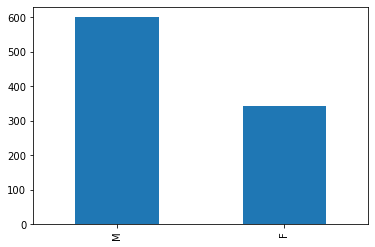

In [21]:
# recorded binary M/F genders - 601 M, 344 F
sex_count = data_uc['sex'].value_counts()
sex_count.plot(kind='bar')

# Identify and replace missing data and empty columns

Look at full rows and columns with missing data to assess how to handle them

In [22]:
# what about missing values?
missing = data_uc.isnull().sum().sort_values(ascending=False)
print(missing)

Unnamed: 122             945
education                 15
IQ                        13
no.                        0
COH.D.beta.j.Cz.m.T5       0
                        ... 
COH.B.theta.g.F8.l.T4      0
COH.B.theta.g.F8.m.T5      0
COH.B.theta.g.F8.n.P3      0
COH.B.theta.g.F8.o.Pz      0
COH.F.gamma.r.O1.s.O2      0
Length: 1149, dtype: int64


In [23]:
# missing entire column 122
data_uc = data_uc.drop(columns='Unnamed: 122')

In [24]:
# missing education from 15 rows and IQ from 13 (only one row missing both)
rows_missing = data_uc[data_uc.isnull().any(axis=1)]
print(rows_missing)

     no. sex    age   eeg.date  education     IQ  \
0      1   M  57.00 2012-08-30        NaN    NaN   
17    18   M  30.00 2013-09-27        NaN   86.0   
21    22   M  20.00 2014-10-23        NaN  116.0   
33    34   F  19.26 2013-08-05       12.0    NaN   
38    39   F  19.47 2014-05-26       12.0    NaN   
42    43   F  32.94 2014-10-16       16.0    NaN   
43    44   F  22.65 2014-11-08       13.0    NaN   
60    61   M  34.00 2016-03-10       12.0    NaN   
92    93   F  39.18 2017-03-03       16.0    NaN   
93    94   F  28.42 2017-03-20        9.0    NaN   
155  156   M  18.00 2013-12-07        NaN  103.0   
173  174   M  23.00 2015-11-14        NaN  113.0   
223  224   M  19.00 2016-07-12       12.0    NaN   
225  226   M  20.00 2016-09-13       13.0    NaN   
234  235   M  20.00 2017-11-22       13.0    NaN   
269  270   M  25.00 2015-09-23        NaN   85.0   
270  271   M  34.00 2015-09-21        NaN  120.0   
278  279   M  21.00 2016-05-13       15.0    NaN   
279  280   M

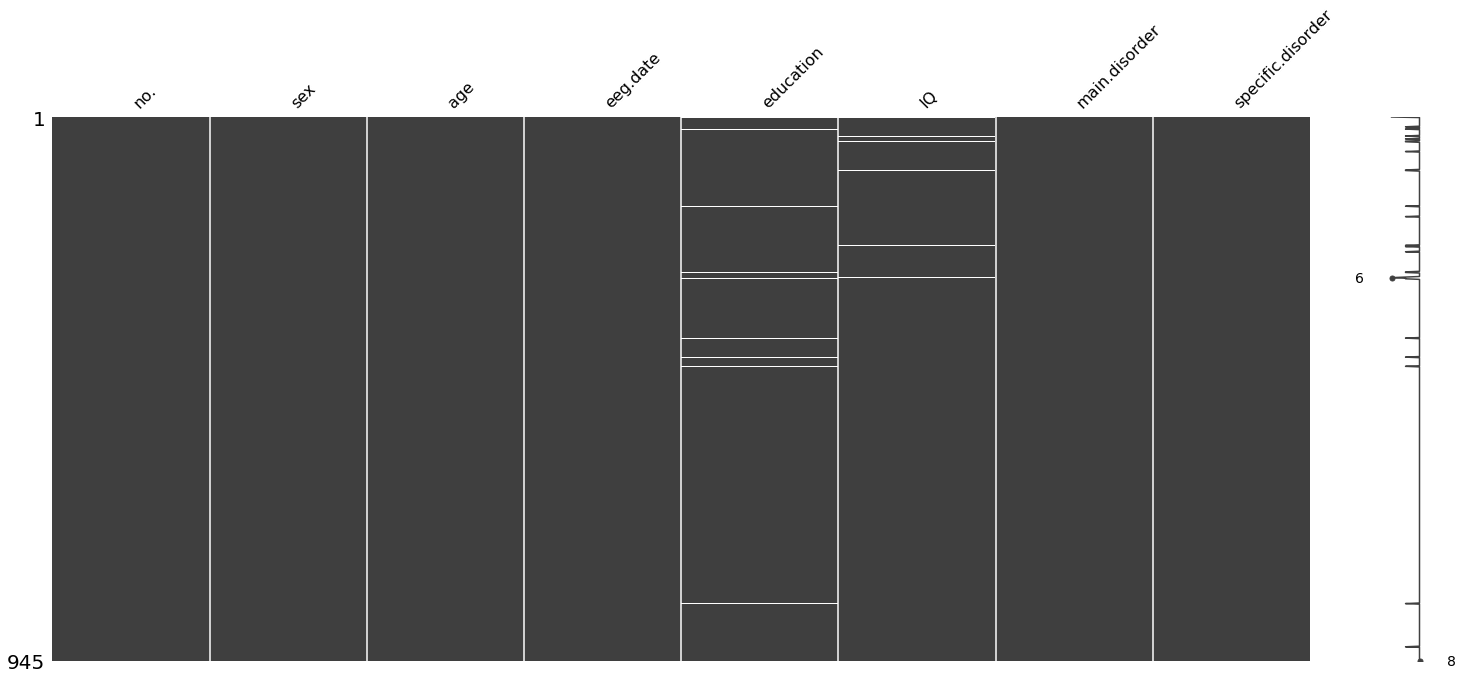

In [25]:
# missing values seem random
cols = data_uc[data_uc.columns[:8]]
msno.matrix(cols)
plt.show()

<AxesSubplot:>

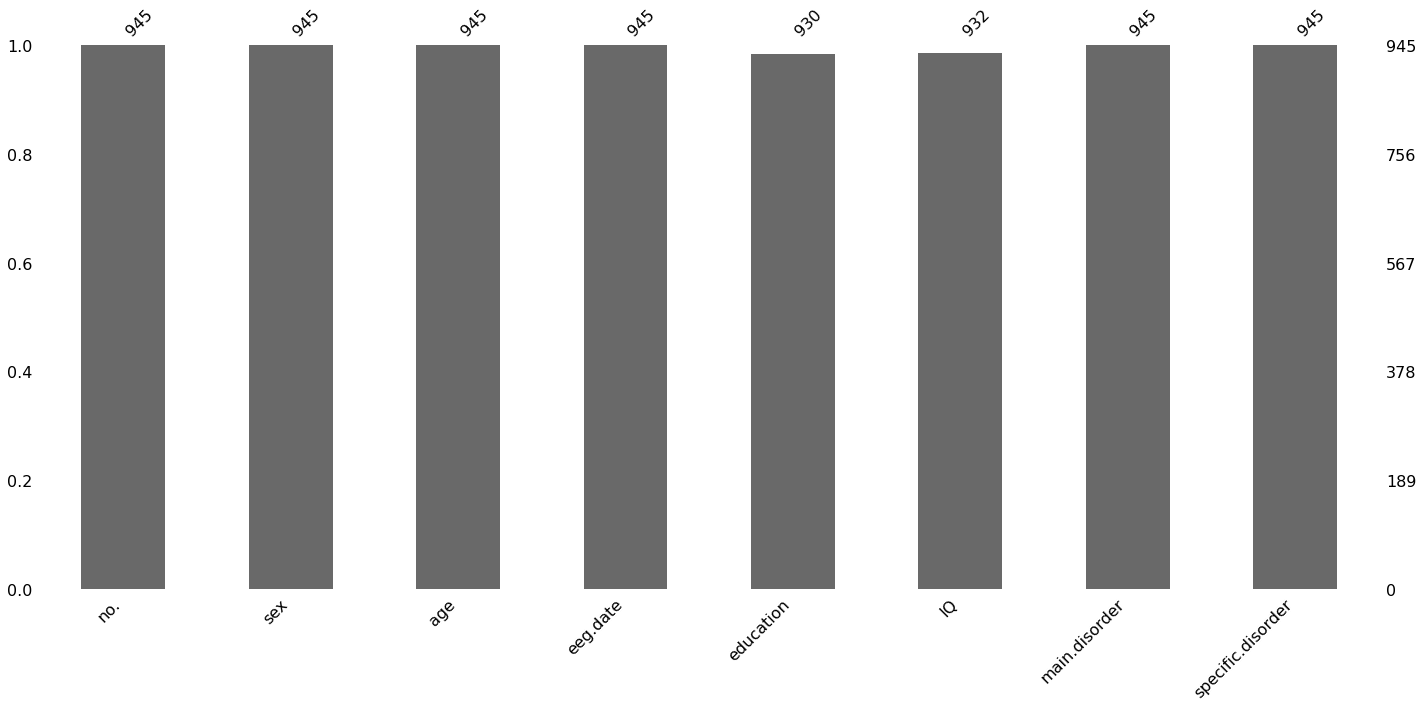

In [26]:
cols_missing = cols[cols.columns]
msno.bar(cols)

In [27]:
# drop NaN rows
data = data_uc[~data_uc.isnull().any(axis=1)]
print(data)

     no. sex   age   eeg.date  education     IQ       main.disorder  \
1      2   M  37.0 2012-09-06        6.0  120.0  Addictive disorder   
2      3   M  32.0 2012-09-10       16.0  113.0  Addictive disorder   
3      4   M  35.0 2012-10-08       18.0  126.0  Addictive disorder   
4      5   M  36.0 2012-10-18       16.0  112.0  Addictive disorder   
5      6   F  24.0 2012-11-21       14.0  105.0  Addictive disorder   
..   ...  ..   ...        ...        ...    ...                 ...   
940  941   M  22.0 2014-08-28       13.0  116.0     Healthy control   
941  942   M  26.0 2014-09-19       13.0  118.0     Healthy control   
942  943   M  26.0 2014-09-27       16.0  113.0     Healthy control   
943  944   M  24.0 2014-09-20       13.0  107.0     Healthy control   
944  945   M  21.0 2015-10-23       13.0  105.0     Healthy control   

        specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  ...  \
1    Alcohol use disorder         13.425118         11.002916  ...   
2    Al

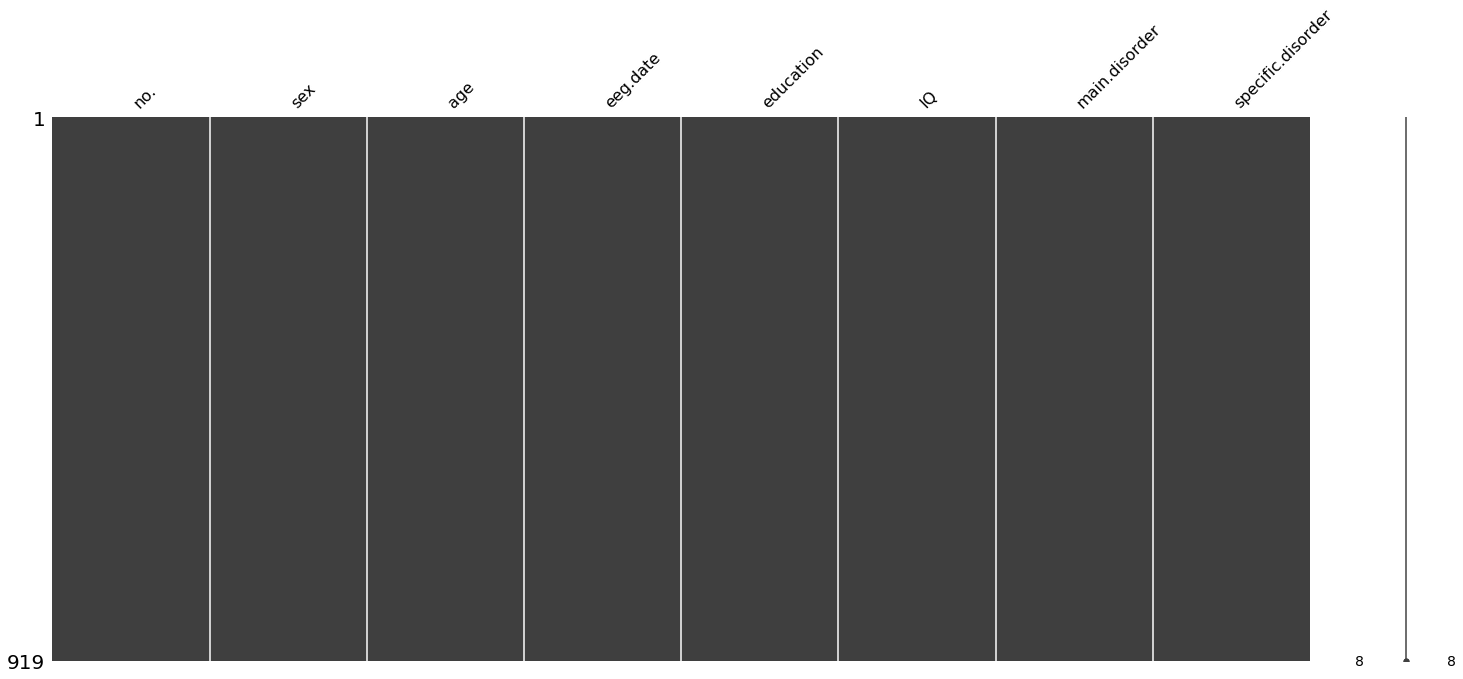

In [28]:
# confirm dropped
cols2 = data[data.columns[:8]]
msno.matrix(cols2)
plt.show()

Create dataframes that are easier to work with for EDA

In [29]:
# create COH coherence/FC dataframe, number of columns 1026 (171 * 6 bands)
coherence = data.filter(regex=r'(^C.*)')

In [30]:
id_df = data.iloc[:,0:8]

In [31]:
id_df['sex'] = id_df['sex'].astype('category')
id_df['main.disorder'] = id_df['main.disorder'].astype('category')
id_df['specific.disorder'] = id_df['specific.disorder'].astype('category')
print(id_df.dtypes)

no.                           int64
sex                        category
age                         float64
eeg.date             datetime64[ns]
education                   float64
IQ                          float64
main.disorder              category
specific.disorder          category
dtype: object


In [32]:
id_df['sex_cat'] = id_df['sex'].cat.codes
id_df['main.disorder_cat'] = id_df['main.disorder'].cat.codes
id_df['specific.disorder_cat'] = id_df['specific.disorder'].cat.codes

In [33]:
print(id_df)

     no. sex   age   eeg.date  education     IQ       main.disorder  \
1      2   M  37.0 2012-09-06        6.0  120.0  Addictive disorder   
2      3   M  32.0 2012-09-10       16.0  113.0  Addictive disorder   
3      4   M  35.0 2012-10-08       18.0  126.0  Addictive disorder   
4      5   M  36.0 2012-10-18       16.0  112.0  Addictive disorder   
5      6   F  24.0 2012-11-21       14.0  105.0  Addictive disorder   
..   ...  ..   ...        ...        ...    ...                 ...   
940  941   M  22.0 2014-08-28       13.0  116.0     Healthy control   
941  942   M  26.0 2014-09-19       13.0  118.0     Healthy control   
942  943   M  26.0 2014-09-27       16.0  113.0     Healthy control   
943  944   M  24.0 2014-09-20       13.0  107.0     Healthy control   
944  945   M  21.0 2015-10-23       13.0  105.0     Healthy control   

        specific.disorder  sex_cat  main.disorder_cat  specific.disorder_cat  
1    Alcohol use disorder        1                  0               

In [34]:
id_coherence = id_df.join(coherence)

In [35]:
# create PSD dataframe, number of columns 114 (19 * 6 bands)
psd = data.filter(regex=r'(^AB.*)')
id_psd = pd.concat(objs=[id_df, psd], axis=1)

In [36]:
# remove 'no.' column for plotting
df1 = id_df.drop(columns=['no.','main.disorder_cat','specific.disorder_cat']).set_index('specific.disorder').groupby('specific.disorder').mean().round(2)
print(df1)

                                  age  education      IQ  sex_cat
specific.disorder                                                
Acute stress disorder           29.53      14.38  104.06     0.09
Adjustment disorder             34.19      13.16   94.24     0.71
Alcohol use disorder            34.11      13.30  103.44     0.80
Behavioral addiction disorder   25.36      13.18  104.39     0.96
Bipolar disorder                29.84      14.11  101.09     0.62
Depressive disorder             31.13      13.05  101.87     0.56
Healthy control                 25.77      14.91  116.30     0.62
Obsessive compulsitve disorder  28.40      13.90  108.02     0.80
Panic disorder                  31.00      13.45   99.59     0.64
Posttraumatic stress disorder   42.52      13.37   98.86     0.27
Schizophrenia                   31.73      12.84   89.62     0.56
Social anxiety disorder         26.51      12.77   95.85     0.85


In [37]:
df2 = id_df.drop(columns=['no.', 'main.disorder_cat','specific.disorder_cat']).set_index('main.disorder').groupby('main.disorder').mean().round(2)
print(df2)

                                      age  education      IQ  sex_cat
main.disorder                                                        
Addictive disorder                  29.73      13.24  103.92     0.88
Anxiety disorder                    28.96      13.14   97.90     0.74
Healthy control                     25.77      14.91  116.30     0.62
Mood disorder                       30.81      13.32  101.68     0.57
Obsessive compulsive disorder       28.40      13.90  108.02     0.80
Schizophrenia                       31.73      12.84   89.62     0.56
Trauma and stress related disorder  36.36      13.59   98.87     0.36
